## Find the simplest neural networks! 


Use diﬀerent activations, number of layers, number of neurons at each layer, compare their performance and ﬁnd the simplest neural net. There could be couple of networks that are fairly close in terms of the performance choose anyone you think has the least complexity and explain your reasoning.




### Expectation Part 1 

#### 1. Use diﬀerent activations. 
#### 2. Number of layers, Number of neurons at each layer, compare their performance and ﬁnd the simplest neural net.
#### 3. There could be couple of networks that are fairly close in terms of the performance choose anyone you think has the least complexity and explain your reasoning 



### Expectation Part 2


#### 4. Create new atributes and use them instead to train the neural network
${X_3} = {X_1^{2}}$

${X_4} = {X_2^{2}}$

${X_5} = {X_1}{X_2}$
#### 5. Find the simplest neural network for hte following set of inputs 

1.{${X_3},{X_4}$}


2.{${X_3},{X_5}$}

3.{${X_3},{X_4},{X_5}$}


4.{${X_1},{X_2},{X_3},{X_4},{X_5}$}





#### 6. remember to validate your model and avoid overfitting






### Project Methology  : 


#### For this project, I am going to use the  MLP ( Multi-layer Perceptron) Classifier provided in SciKit Learn.
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html 

This model optimizes the log-loss function using LBFGS or stochastic gradient descent.

#### For each individual input set we will complete the following steps :


1. Adjust the main DataSet according to the features that are needed as input. 
2. Create a plot with the data to get an visual understanding of the different inputs  
3. Shuffle the data prior to applying the MLP model 
4. Split the data 
5. Normalize the data 
6. Loop through different Activations and Number of Layers and Neurons per layer
7. Select the top performers
8. Run the classifier for those top performers and choose the simplest Neural Network 



In [1]:
import pandas as pd

color_data=pd.read_csv(r"C:\Users\User\OneDrive\FoundationsML\FinalProject\train_set.txt",delimiter=',', header=None)#home


#color_data=pd.read_csv(r"C:\Users\scabellos\OneDrive - Urban Science\User Documents\MastersDegree\ML\Final\train_set.txt", 
#                      delimiter=',', header=None)#home

color_data.columns=['X1','X2','Color']

In [2]:
color_data.head()

,X1,X2,Color
0,16.263398,13.299206,r
1,0.775408,23.986692,r
2,29.170503,-3.287474,r
3,6.739044,-28.033329,r
4,3.216100,22.013695,r


In [3]:
color_data.describe()

,X1,X2
count,685.000000,685.000000
mean,0.596296,1.079071
std,18.941957,18.789436
min,-54.531886,-57.232861
25%,-16.376391,-14.788019
50%,0.387794,0.474620
75%,17.255583,16.628887
max,58.905065,60.321524


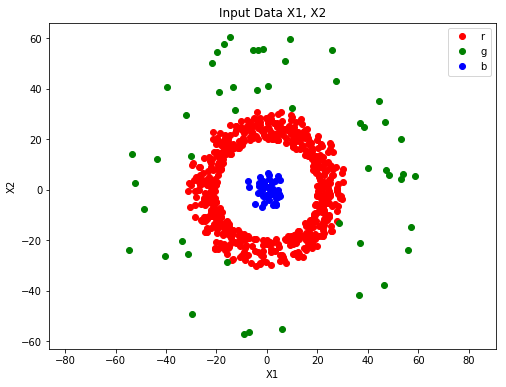

In [7]:
# Visualize the input data sets
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
#plt.subplot(1, 2, 1)
red=color_data[color_data['Color'].str.contains('r')]
green=color_data[color_data['Color'].str.contains('g')]
blue=color_data[color_data['Color'].str.contains('b')]
plt.plot(red["X1"], red["X2"],'r', linestyle='none', marker='o', label='r')
plt.plot(green["X1"], green["X2"],'g', linestyle='none', marker='o', label='g')
plt.plot(blue["X1"], blue["X2"],'b', linestyle='none', marker='o', label='b')
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.legend()
plt.title("Input Data X1, X2")
plt.show()
#plt.plot(x0, y0, "r.", markersize=10)


In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss #log_loss(y_true, y_pred)
from sklearn.metrics import confusion_matrix

In [182]:
y = color_data['Color']
x = color_data.drop(['Color'], axis=1)

#,'X3','X4','X5'

Always shuffle your training data, both before training and during training

In [184]:
from sklearn.utils import shuffle
x,y = shuffle(x,y,random_state=0)

In [185]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=27)

#### Scaling the training and test data sets. 



Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set. 
This is because the test set plays the role of fresh unseen data, so it's not supposed to be accessible at the training stage. Using any information coming from the test set before or during training is a potential bias in the evaluation of the performance.



In [186]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


In [187]:
# Define layers and Neurons per layer - 
import itertools  
layers=[4,5,6,7,8]
neurons=[2,3,4,5]
hidden_layer_sizes=list(itertools.product(layers,neurons))
print(list(hidden_layer_sizes))

[(4, 2), (4, 3), (4, 4), (4, 5), (5, 2), (5, 3), (5, 4), (5, 5), (6, 2), (6, 3), (6, 4), (6, 5), (7, 2), (7, 3), (7, 4), (7, 5), (8, 2), (8, 3), (8, 4), (8, 5)]


In [188]:
import itertools 
# Define layers and Neurons per layer - 
layers=[3,4,5,6,7,8,9,10]
neurons=[2,3,4,5,6]
hidden_layer_sizes=list(itertools.product(layers,neurons))
#diff activation
models=('identity', 'logistic', 'tanh', 'relu')
    
acc=[]
layer=[]
activation=[]
for h in hidden_layer_sizes:
    for a in models:
        clf = MLPClassifier(hidden_layer_sizes=h,activation=a ,max_iter=200, alpha=0.01,
                            learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        acc.append(accuracy_score(y_test, y_pred))
        #loss_log.append(log_loss(y_test, y_pred))
        layer.append(h)
        activation.append(a)


In [189]:
d={'Acuracy':acc,'Layers and Neurons per Layer':layer, 'Activation':activation}
history=pd.DataFrame(d)
history.sort_values('Acuracy',ascending=False).head()

,Acuracy,Layers and Neurons per Layer,Activation
21,1.000000,"(4, 2)",logistic
7,0.992701,"(3, 3)",relu
81,0.992701,"(7, 2)",logistic
141,0.992701,"(10, 2)",logistic
69,0.985401,"(6, 4)",logistic


In [190]:
acc_42_log=[]
train_42_log=[]
test_42_log=[]
iter_log=[]

for i in range(1,500,1):
    clf = MLPClassifier(hidden_layer_sizes=(4, 2), activation='logistic',max_iter=i, alpha=0.01,
                        learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001)
    x_train,y_train = shuffle(x_train,y_train,random_state=0)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc_42_log.append(accuracy_score(y_test, y_pred))
    train_42_log.append(clf.score(x_train, y_train))
    test_42_log.append(clf.score(x_test, y_test))
    iter_log.append(i)

In [191]:
acc_33_relu=[]
train_33_relu=[]
test_33_relu=[]
iter_log=[]

for i in range(1,500,1):
    clf = MLPClassifier(hidden_layer_sizes=(3, 3), activation='relu',max_iter=i, alpha=0.01,
                        learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001)
    x_train,y_train = shuffle(x_train,y_train,random_state=0)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc_33_relu.append(accuracy_score(y_test, y_pred))
    train_33_relu.append(clf.score(x_train, y_train))
    test_33_relu.append(clf.score(x_test, y_test))
    iter_log.append(i)

In [172]:

#param_42={'Acc':acc_42_relu,'Iter':iter_42_relu, 'Train':train_42_relu,'Test':test_42_relu}
#p=pd.DataFrame(param)


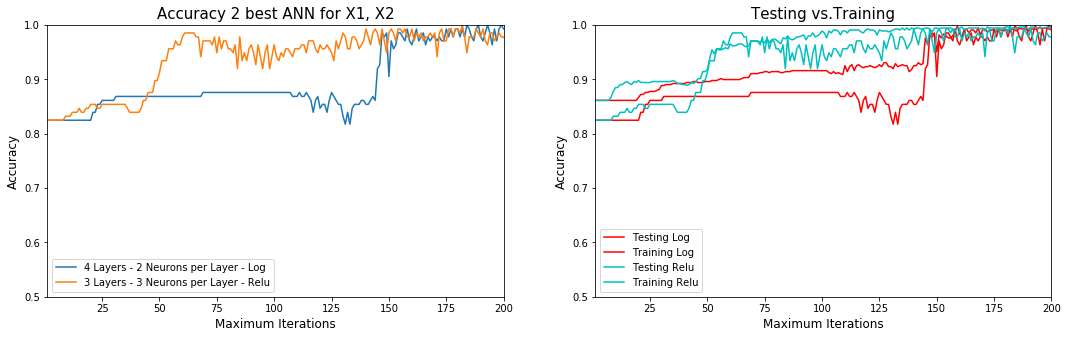

In [207]:
plt.figure(figsize=(18, 5))



plt.subplot(121)
#plt.figure(figsize=(8,6))
plt.plot(iter_log, acc_42_log,label='4 Layers - 2 Neurons per Layer - Log ')
plt.plot(iter_log, acc_33_relu,label='3 Layers - 3 Neurons per Layer - Relu')
plt.xlabel("Maximum Iterations", size=12,)
#plt.xticks(iter_opt,rotation=45)
plt.ylim(0.5,1)
plt.xlim(1,200)
plt.ylabel("Accuracy", size=12)
plt.legend()
plt.title("Accuracy 2 best ANN for X1, X2" , size=15);


plt.subplot(122)
#plt.figure(figsize=(8,6))
plt.plot(iter_log, test_42_log,label='Testing Log',c='r')
plt.plot(iter_log, train_42_log,label='Training Log',c='r')

plt.plot(iter_43_log, test_33_relu,label='Testing Relu',c='c')
plt.plot(iter_33_log, train_33_relu,label='Training Relu',c='c')

plt.xlabel("Maximum Iterations", size=12,)
#plt.xticks(iter_opt,rotation=45)
plt.ylim(0.5,1)
plt.xlim(1,200)
plt.ylabel("Accuracy", size=12)
plt.legend()
plt.title("Testing vs.Training" , size=15);


As we can see above, both networks are showing no real difference between having more of less layers. Also, the validation between the training and the testing seems to be working .There is not difference in accuracy when we apply the model to the testing portion. 


Therefore, the simplest ANN we can choose is the one with 3 Layers and 3 Neurons each "


##### clf = MLPClassifier(hidden_layer_sizes=(3, 3), activation='relu',max_iter=200, alpha=0.01,learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001)






------------------------------------------------------------------------------------------------------------------------------





## Build new attributes


In this section you will create new attributes and you are going to use them instead to train the neural network. If we call the ﬁrst attributes X1 and the second attributes X2, then the other 3 are as follows : 


${X_3} = {X_1^{2}}$

${X_4} = {X_2^{2}}$

${X_5} = {X_1}{X_2}$


In [ ]:

#we are going to add 2 more columns x3, x4, x5 as transformations of x1, x2. 


x['X3']=x['X1']**2
x['X4']=x['X2']**2
x['X5']=x['X1']*x['X2']



In [205]:
x.describe()

,X1,X2,X3,X4,X5
count,685.000000,685.000000,685.000000,685.000000,685.000000
mean,0.596296,1.079071,358.629530,353.691913,5.680638
std,18.941957,18.789436,449.393834,487.551574,310.810705
min,-54.531886,-57.232861,0.002542,0.000336,-1748.536152
25%,-16.376391,-14.788019,62.449312,53.282900,-186.751491
50%,0.387794,0.474620,282.629310,255.449217,0.607447
75%,17.255583,16.628887,486.790988,477.055737,200.394167
max,58.905065,60.321524,3469.806718,3638.686301,1561.284233


In [206]:
x.head()

,X1,X2,X3,X4,X5
113,12.902939,-26.460127,166.485847,700.138329,-341.413419
378,22.890068,-9.818271,523.955195,96.398446,-224.740887
303,-8.750410,-27.778819,76.569677,771.662762,243.076054
504,-28.774525,3.666723,827.973275,13.444857,-105.508208
301,-20.308263,-7.984472,412.425528,63.751799,162.150761


We are also going to add them to the main data frame so we can visualize the new data with the corresponding labels. 

In [204]:

color_data['X3']=color_data['X1']**2
color_data['X4']=color_data['X2']**2
color_data['X5']=color_data['X1']*color_data['X2']
color_data = color_data[['X1', 'X2', 'X3', 'X4','X5','Color']]
print(color_data.head())


          X1         X2          X3          X4          X5 Color
0  16.263398  13.299206  264.498124  176.868878  216.290282     r
1   0.775408  23.986692    0.601257  575.361405   18.599466     r
2  29.170503  -3.287474  850.918251   10.807487  -95.897279     r
3   6.739044 -28.033329   45.414707  785.867535 -188.917824     r
4   3.216100  22.013695   10.343297  484.602776   70.798239     r




## 5. Find the simplest neural network for hte following set of inputs 


1.{${X_3},{X_4}$}


2.{${X_3},{X_5}$}

3.{${X_3},{X_4},{X_5}$}


4.{${X_1},{X_2},{X_3},{X_4},{X_5}$}


Lets start with number 1 


In [208]:
x34 = x.drop(columns=['X1','X2','X5'] , axis=1)

In [209]:
x34.head()

,X3,X4
113,166.485847,700.138329
378,523.955195,96.398446
303,76.569677,771.662762
504,827.973275,13.444857
301,412.425528,63.751799


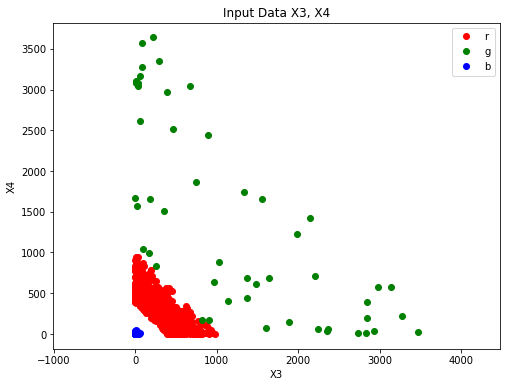

In [64]:
# Visualize the input data sets

plt.figure(figsize=(8, 6))
red=color_data[color_data['Color'].str.contains('r')]
green=color_data[color_data['Color'].str.contains('g')]
blue=color_data[color_data['Color'].str.contains('b')]
plt.plot(red["X3"], red["X4"],'r', linestyle='none', marker='o', label='r')
plt.plot(green["X3"], green["X4"],'g', linestyle='none', marker='o', label='g')
plt.plot(blue["X3"], blue["X4"],'b', linestyle='none', marker='o', label='b')
plt.xlabel("X3")
plt.ylabel("X4")
plt.axis('equal')
plt.legend()
plt.title("Input Data X3, X4");

In [215]:
x34,y = shuffle(x34,y,random_state=0)
x34_train, x34_test, y_train, y_test = train_test_split(x34,y, test_size= 0.2, random_state=27)

In [216]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x34_train=scaler.fit_transform(x34_train)
x34_test=scaler.fit_transform(x34_test)


In [217]:
import itertools 
# Define layers and Neurons per layer - 
layers=[3,4,5,6,7,8,9,10]
neurons=[2,3,4,5,6]
hidden_layer_sizes=list(itertools.product(layers,neurons))
#diff activation
models=('identity', 'logistic', 'tanh', 'relu')
    
acc=[]
layer=[]
activation=[]
for h in hidden_layer_sizes:
    for a in models:
        clf = MLPClassifier(hidden_layer_sizes=h,activation=a ,max_iter=200, alpha=0.01,
                            learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001)
        clf.fit(x34_train, y_train)
        y_pred = clf.predict(x34_test)
        acc.append(accuracy_score(y_test, y_pred))
        #loss_log.append(log_loss(y_test, y_pred))
        layer.append(h)
        activation.append(a)


In [219]:
d={'Acuracy':acc,'Layers and Neurons per Layer':layer, 'Activation':activation}
history=pd.DataFrame(d)
history.sort_values('Acuracy',ascending=False).head()

,Acuracy,Layers and Neurons per Layer,Activation
0,0.985401,"(3, 2)",identity
1,0.985401,"(3, 2)",logistic
102,0.985401,"(8, 2)",tanh
103,0.985401,"(8, 2)",relu
104,0.985401,"(8, 3)",identity


In [224]:
acc_32_ident=[]
iter_32_ident=[]
train_32_ident=[]
test_32_ident=[]
for i in range(1,500,1):
    clf = MLPClassifier(hidden_layer_sizes=(3, 2), activation='identity',max_iter=i, alpha=0.001,
                        learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001)
    x34_train,y_train = shuffle(x34_train,y_train,random_state=0)
    clf.fit(x34_train, y_train)
    y_pred = clf.predict(x34_test)
    acc_32_ident.append(accuracy_score(y_test, y_pred))
    train_32_ident.append(clf.score(x34_train, y_train))
    test_32_ident.append(clf.score(x34_test, y_test))
    iter_32_ident.append(i)
    
    
    
acc_32_log=[]
iter_32_log=[]
train_32_log=[]
test_32_log=[]

for i in range(1,500,1):
    clf = MLPClassifier(hidden_layer_sizes=(3, 2), activation='logistic',max_iter=i, alpha=0.001,
                        learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001)
    x34_train,y_train = shuffle(x34_train,y_train,random_state=0)
    clf.fit(x34_train, y_train)
    y_pred = clf.predict(x34_test)
    acc_32_log.append(accuracy_score(y_test, y_pred))
    train_32_log.append(clf.score(x34_train, y_train))
    test_32_log.append(clf.score(x34_test, y_test))
    iter_32_log.append(i)

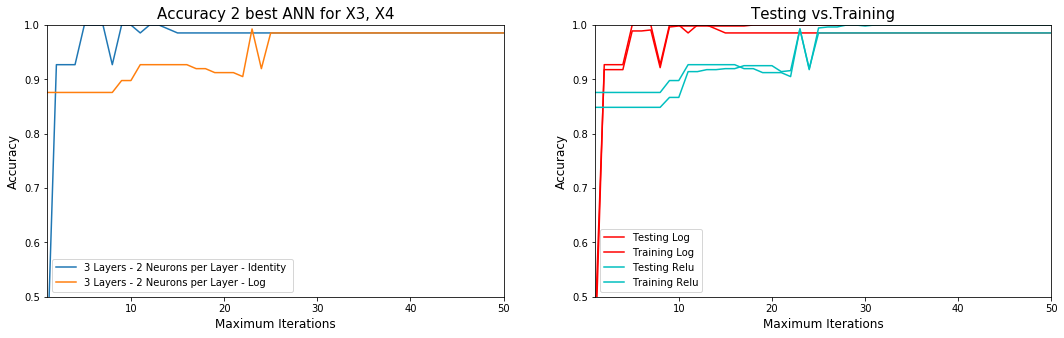

In [226]:
plt.figure(figsize=(18, 5))


plt.subplot(121)
#plt.figure(figsize=(8,6))
plt.plot(iter_log, acc_32_ident,label='3 Layers - 2 Neurons per Layer - Identity ')
plt.plot(iter_log, acc_32_log,label='3 Layers - 2 Neurons per Layer - Log')
plt.xlabel("Maximum Iterations", size=12,)
#plt.xticks(iter_opt,rotation=45)
plt.ylim(0.5,1)
plt.xlim(1,50)
plt.ylabel("Accuracy", size=12)
plt.legend()
plt.title("Accuracy 2 best ANN for X3, X4" , size=15);


plt.subplot(122)
#plt.figure(figsize=(8,6))
plt.plot(iter_log, test_32_ident,label='Testing Log',c='r')
plt.plot(iter_log, train_32_ident,label='Training Log',c='r')

plt.plot(iter_log, test_32_log,label='Testing Relu',c='c')
plt.plot(iter_log, train_32_log,label='Training Relu',c='c')

plt.xlabel("Maximum Iterations", size=12,)
#plt.xticks(iter_opt,rotation=45)
plt.ylim(0.5,1)
plt.xlim(1,50)
plt.ylabel("Accuracy", size=12)
plt.legend()
plt.title("Testing vs.Training" , size=15);


The simplest ANN we can choose is the one with 3 Layers and 3 Neurons each - Using the easiest Activation = "Identity" 


##### clf = MLPClassifier(hidden_layer_sizes=(3, 3), activation='Identity',max_iter=25, alpha=0.001,learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001)


### Next set of Inputs will be : 

2.{${X_3},{X_5}$}

In [229]:
x35 = x.drop(columns=['X1','X2','X4'] , axis=1)
x35.head()



,X3,X5
113,166.485847,-341.413419
378,523.955195,-224.740887
303,76.569677,243.076054
504,827.973275,-105.508208
301,412.425528,162.150761


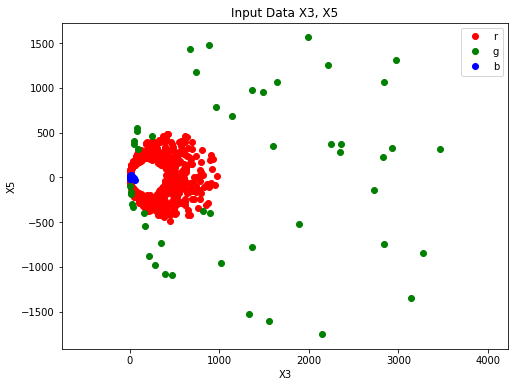

In [78]:
# Visualize the input data sets

plt.figure(figsize=(8, 6))
#plt.subplot(1, 2, 1)
red=color_data[color_data['Color'].str.contains('r')]
green=color_data[color_data['Color'].str.contains('g')]
blue=color_data[color_data['Color'].str.contains('b')]
plt.plot(red["X3"], red["X5"],'r', linestyle='none', marker='o', label='r')
plt.plot(green["X3"], green["X5"],'g', linestyle='none', marker='o', label='g')
plt.plot(blue["X3"], blue["X5"],'b', linestyle='none', marker='o', label='b')
plt.xlabel("X3")
plt.ylabel("X5")
plt.axis('equal')
plt.legend()
plt.title("Input Data X3, X5");

Now we are going to train our Neural Network using X3 and X5 as input 

In [230]:
x35 , y = shuffle(x35,y,random_state=0)
x35_train, x35_test, y_train, y_test = train_test_split(x35, y, test_size= 0.2, random_state=27)

In [231]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x35_train=scaler.fit_transform(x35_train)
x35_test=scaler.fit_transform(x35_test)

In [232]:

# Define layers and Neurons per layer - 
layers=[3,4,5,6,7,8,9,10]
neurons=[2,3,4,5,6]
hidden_layer_sizes=list(itertools.product(layers,neurons))
#diff activation
models=('identity', 'logistic', 'tanh', 'relu')
    
acc=[]
layer=[]
activation=[]
for h in hidden_layer_sizes:
    for a in models:
        clf = MLPClassifier(hidden_layer_sizes=h,activation=a ,max_iter=200, alpha=0.01,
                            learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001)
        clf.fit(x35_train, y_train)
        y_pred = clf.predict(x35_test)
        acc.append(accuracy_score(y_test, y_pred))
        #loss_log.append(log_loss(y_test, y_pred))
        layer.append(h)
        activation.append(a)


In [233]:
d={'Acuracy':acc,'Layers and Neurons per Layer':layer, 'Activation':activation}
history=pd.DataFrame(d)
history.sort_values('Acuracy',ascending=False).head()

,Acuracy,Layers and Neurons per Layer,Activation
45,0.868613,"(5, 3)",logistic
110,0.868613,"(8, 4)",tanh
105,0.861314,"(8, 3)",logistic
103,0.861314,"(8, 2)",relu
101,0.861314,"(8, 2)",logistic


In [235]:
acc_53_log=[]
train_53_log=[]
test_53_log=[]

for i in range(1,500,1):
    clf = MLPClassifier(hidden_layer_sizes=(5, 3), activation='logistic',max_iter=i, alpha=0.01,
                        learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001)
    x35_train,y_train = shuffle(x35_train,y_train,random_state=0)
    clf.fit(x35_train, y_train)
    y_pred = clf.predict(x35_test)
    acc_53_log.append(accuracy_score(y_test, y_pred))
    train_53_log.append(clf.score(x35_train, y_train))
    test_53_log.append(clf.score(x35_test, y_test)) 
    
acc_84_tanh=[]
train_84_tanh=[]
test_84_tanh=[]

for i in range(1,500,1):
    clf = MLPClassifier(hidden_layer_sizes=(8, 4), activation='tanh',max_iter=i, alpha=0.01,
                        learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001)
    x35_train,y_train = shuffle(x35_train,y_train,random_state=0)
    clf.fit(x35_train, y_train)
    y_pred = clf.predict(x35_test)
    acc_84_tanh.append(accuracy_score(y_test, y_pred))
    train_84_tanh.append(clf.score(x35_train, y_train))
    test_84_tanh.append(clf.score(x35_test, y_test)) 
  

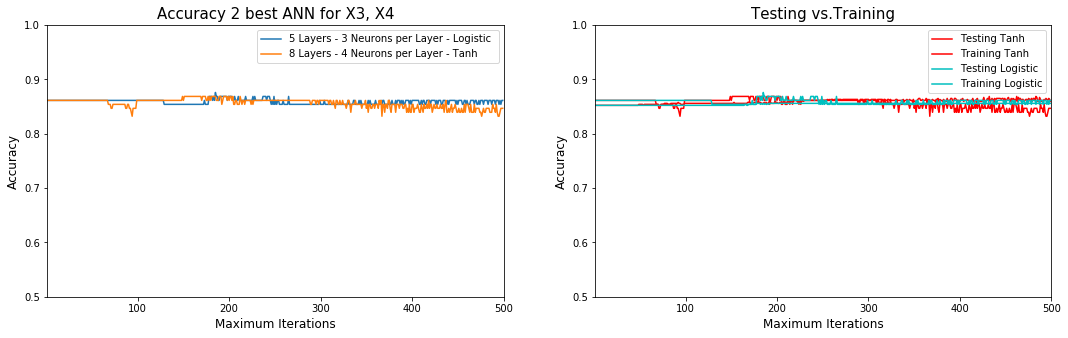

In [238]:
plt.figure(figsize=(18, 5))


plt.subplot(121)
#plt.figure(figsize=(8,6))
plt.plot(iter_log, acc_53_log,label='5 Layers - 3 Neurons per Layer - Logistic ')
plt.plot(iter_log, acc_84_tanh,label='8 Layers - 4 Neurons per Layer - Tanh')
plt.xlabel("Maximum Iterations", size=12,)
#plt.xticks(iter_opt,rotation=45)
plt.ylim(0.5,1)
plt.xlim(1,500)
plt.ylabel("Accuracy", size=12)
plt.legend()
plt.title("Accuracy 2 best ANN for X3, X4" , size=15);


plt.subplot(122)
#plt.figure(figsize=(8,6))
plt.plot(iter_log, test_84_tanh,label='Testing Tanh',c='r')
plt.plot(iter_log, train_84_tanh,label='Training Tanh',c='r')

plt.plot(iter_log, test_53_log,label='Testing Logistic',c='c')
plt.plot(iter_log, train_53_log,label='Training Logistic',c='c')

plt.xlabel("Maximum Iterations", size=12,)
#plt.xticks(iter_opt,rotation=45)
plt.ylim(0.5,1)
plt.xlim(1,500)
plt.ylabel("Accuracy", size=12)
plt.legend()
plt.title("Testing vs.Training" , size=15);

The simplest ANN we can choose is the one with 5 Layers and 3 Neurons each - Using the easiest Activation = "Logistic" 


##### clf = MLPClassifier(hidden_layer_sizes=(5, 3), activation='logistic',max_iter=i, alpha=0.01,learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001)


### Next , we will use 3 inputs like :

3. {${X_3},{X_4},{X_5}$}

In [239]:
x345 = x.drop(columns=['X1','X2'] , axis=1)
x345.head()

,X3,X4,X5
113,166.485847,700.138329,-341.413419
378,523.955195,96.398446,-224.740887
303,76.569677,771.662762,243.076054
504,827.973275,13.444857,-105.508208
301,412.425528,63.751799,162.150761


### Lets visualize the Inputs 

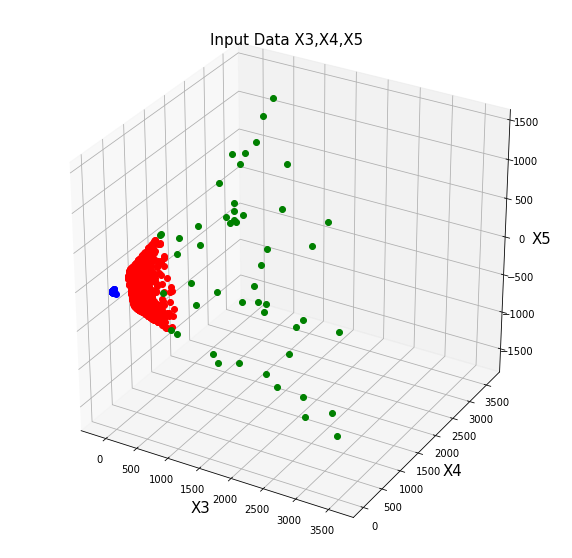

In [103]:

from mpl_toolkits import mplot3d 
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# Visualize the input data sets


#plt.subplot(1, 2, 1)
red=color_data[color_data['Color'].str.contains('r')]
green=color_data[color_data['Color'].str.contains('g')]
blue=color_data[color_data['Color'].str.contains('b')]
ax.plot3D(red["X3"], red["X4"], red["X5"],'r', linestyle='none', marker='o', label='r')
ax.plot3D(green["X3"],green["X4"], green["X5"],'g', linestyle='none', marker='o', label='g')
ax.plot3D(blue["X3"],blue["X4"], blue["X5"],'b', linestyle='none', marker='o', label='b')

ax.set_xlabel('X3', fontsize=15)
ax.set_ylabel('X4', fontsize=15)
ax.set_zlabel('X5', fontsize=15);
plt.axis('equal')
#plt.legend()
plt.title("Input Data X3,X4,X5",fontsize=15);

In [240]:
x345 , y = shuffle(x345,y,random_state=0)
x345_train, x345_test, y_train, y_test = train_test_split(x345, y, test_size= 0.2, random_state=27)

x345_train=scaler.fit_transform(x345_train)
x345_test=scaler.fit_transform(x345_test)

In [241]:

# Define layers and Neurons per layer - 
layers=[3,4,5,6,7,8,9,10]
neurons=[2,3,4,5,6]
hidden_layer_sizes=list(itertools.product(layers,neurons))
#diff activation
models=('identity', 'logistic', 'tanh', 'relu')
    
acc=[]
layer=[]
activation=[]
for h in hidden_layer_sizes:
    for a in models:
        clf = MLPClassifier(hidden_layer_sizes=h,activation=a ,max_iter=200, alpha=0.01,
                            learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001)
        clf.fit(x345_train, y_train)
        y_pred = clf.predict(x345_test)
        acc.append(accuracy_score(y_test, y_pred))
        #loss_log.append(log_loss(y_test, y_pred))
        layer.append(h)
        activation.append(a)


In [244]:
d={'Acuracy':acc,'Layers and Neurons per Layer':layer, 'Activation':activation}
history=pd.DataFrame(d)
history.sort_values('Acuracy',ascending=False).head()

,Acuracy,Layers and Neurons per Layer,Activation
0,0.861314,"(3, 2)",identity
40,0.861314,"(5, 2)",identity
88,0.861314,"(7, 4)",identity
84,0.861314,"(7, 3)",identity
83,0.861314,"(7, 2)",relu


In [245]:
acc_32_id=[]
train_32_id=[]
test_32_id=[]
for i in range(1,500,1):
    clf = MLPClassifier(hidden_layer_sizes=(3, 2), activation='identity',max_iter=i, alpha=0.01,
                        learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001)
    x345_train,y_train = shuffle(x345_train,y_train,random_state=0)
    clf.fit(x345_train, y_train)
    y_pred = clf.predict(x345_test)
    train_32_id.append(clf.score(x345_train, y_train))
    test_32_id.append(clf.score(x345_test, y_test)) 
    acc_32_id.append(accuracy_score(y_test, y_pred))
    
      
        
acc_52_id=[]
train_52_id=[]
test_52_id=[]
for i in range(1,500,1):
    clf = MLPClassifier(hidden_layer_sizes=(5, 2), activation='identity',max_iter=i, alpha=0.01,
                        learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001)
    x345_train,y_train = shuffle(x345_train,y_train,random_state=0)
    clf.fit(x345_train, y_train)
    y_pred = clf.predict(x345_test)
    train_52_id.append(clf.score(x345_train, y_train))
    test_52_id.append(clf.score(x345_test, y_test)) 
    acc_52_id.append(accuracy_score(y_test, y_pred))
    
      

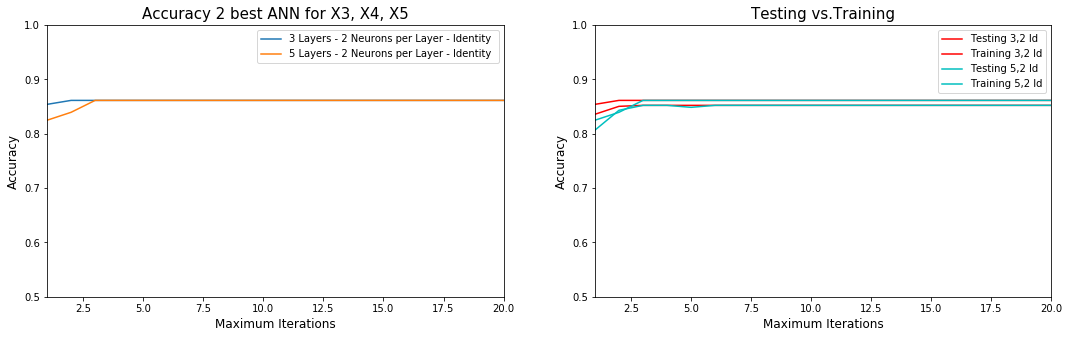

In [252]:
plt.figure(figsize=(18, 5))


plt.subplot(121)
#plt.figure(figsize=(8,6))
plt.plot(iter_log, acc_32_id,label='3 Layers - 2 Neurons per Layer - Identity ')
plt.plot(iter_log, acc_52_id,label='5 Layers - 2 Neurons per Layer - Identity')
plt.xlabel("Maximum Iterations", size=12,)
#plt.xticks(iter_opt,rotation=45)
plt.ylim(0.5,1)
plt.xlim(1,20)
plt.ylabel("Accuracy", size=12)
plt.legend()
plt.title("Accuracy 2 best ANN for X3, X4, X5" , size=15);


plt.subplot(122)
#plt.figure(figsize=(8,6))
plt.plot(iter_log, test_32_id,label='Testing 3,2 Id',c='r')
plt.plot(iter_log, train_32_id,label='Training 3,2 Id',c='r')

plt.plot(iter_log, test_52_id,label='Testing 5,2 Id',c='c')
plt.plot(iter_log, train_52_id,label='Training 5,2 Id',c='c')

plt.xlabel("Maximum Iterations", size=12,)
#plt.xticks(iter_opt,rotation=45)
plt.ylim(0.5,1)
plt.xlim(1,20)
plt.ylabel("Accuracy", size=12)
plt.legend()
plt.title("Testing vs.Training" , size=15);


The simplest ANN we can choose is the one with 3 Layers and 2 Neurons each - Using the easiest Activation = "Identity" 


#####  clf = MLPClassifier(hidden_layer_sizes=(3, 2), activation='identity',max_iter=i, alpha=0.01,learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001)


### And finally, lets build the neural network for the last exercise. 

4.{${X_1},{X_2},{X_3},{X_4},{X_5}$}

In [253]:
x_all = x
x_all.head()

,X1,X2,X3,X4,X5
113,12.902939,-26.460127,166.485847,700.138329,-341.413419
378,22.890068,-9.818271,523.955195,96.398446,-224.740887
303,-8.750410,-27.778819,76.569677,771.662762,243.076054
504,-28.774525,3.666723,827.973275,13.444857,-105.508208
301,-20.308263,-7.984472,412.425528,63.751799,162.150761


In [254]:
x_all , y = shuffle(x_all,y,random_state=0)
x_all_train, x_all_test, y_train, y_test = train_test_split(x_all, y, test_size= 0.2, random_state=27)

x_all_train=scaler.fit_transform(x_all_train)
x_all_test=scaler.fit_transform(x_all_test)


In [255]:

# Define layers and Neurons per layer - 
layers=[3,4,5,6,7,8,9,10]
neurons=[2,3,4,5,6]
hidden_layer_sizes=list(itertools.product(layers,neurons))
#diff activation
models=('identity', 'logistic', 'tanh', 'relu')
    
acc=[]
layer=[]
activation=[]
for h in hidden_layer_sizes:
    for a in models:
        clf = MLPClassifier(hidden_layer_sizes=h,activation=a ,max_iter=200, alpha=0.01,
                            learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001)
        clf.fit(x_all_train, y_train)
        y_pred = clf.predict(x_all_test)
        acc.append(accuracy_score(y_test, y_pred))
        #loss_log.append(log_loss(y_test, y_pred))
        layer.append(h)
        activation.append(a)



In [256]:
d={'Acuracy':acc,'Layers and Neurons per Layer':layer, 'Activation':activation}
history=pd.DataFrame(d)
history.sort_values('Acuracy',ascending=False).head()

,Acuracy,Layers and Neurons per Layer,Activation
39,0.890511,"(4, 6)",relu
26,0.890511,"(4, 3)",tanh
23,0.890511,"(4, 2)",relu
88,0.883212,"(7, 4)",identity
84,0.883212,"(7, 3)",identity


In [258]:
history['Acuracy'].value_counts().head()

0.883212    45
0.868613    20
0.875912    20
0.861314    19
0.846715     9
Name: Acuracy, dtype: int64

In [259]:
acc_42_re=[]
train_42_re=[]
test_42_re=[]
for i in range(1,500,1):
    clf = MLPClassifier(hidden_layer_sizes=(4, 2), activation='relu',max_iter=i, alpha=0.01,
                        learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001,early_stopping=True)
    x_all_train,y_train = shuffle(x_all_train,y_train,random_state=0)
    clf.fit(x_all_train, y_train)
    y_pred = clf.predict(x_all_test)
    train_42_re.append(clf.score(x_all_train, y_train))
    test_42_re.append(clf.score(x_all_test, y_test)) 
    acc_42_re.append(accuracy_score(y_test, y_pred))
   
      
        
acc_43_ta=[]
train_43_ta=[]
test_43_ta=[]
for i in range(1,500,1):
    clf = MLPClassifier(hidden_layer_sizes=(4, 3), activation='tanh',max_iter=i, alpha=0.01,
                        learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001,early_stopping=True)
    x_all_train,y_train = shuffle(x_all_train,y_train,random_state=0)
    clf.fit(x_all_train, y_train)
    y_pred = clf.predict(x_all_test)
    acc_43_ta.append(accuracy_score(y_test, y_pred))
    train_43_ta.append(clf.score(x_all_train, y_train))
    test_43_ta.append(clf.score(x_all_test, y_test)) 
    

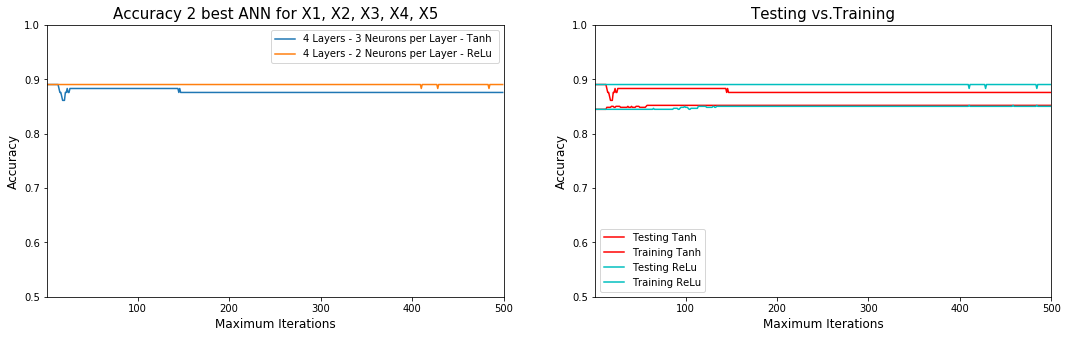

In [262]:
plt.figure(figsize=(18, 5))


plt.subplot(121)
#plt.figure(figsize=(8,6))
plt.plot(iter_log, acc_43_ta,label='4 Layers - 3 Neurons per Layer - Tanh ')
plt.plot(iter_log, acc_42_re,label='4 Layers - 2 Neurons per Layer - ReLu')
plt.xlabel("Maximum Iterations", size=12,)
#plt.xticks(iter_opt,rotation=45)
plt.ylim(0.5,1)
plt.xlim(1,500)
plt.ylabel("Accuracy", size=12)
plt.legend()
plt.title("Accuracy 2 best ANN for X1, X2, X3, X4, X5" , size=15);


plt.subplot(122)
#plt.figure(figsize=(8,6))
plt.plot(iter_log, test_43_ta,label='Testing Tanh',c='r')
plt.plot(iter_log, train_43_ta,label='Training Tanh',c='r')

plt.plot(iter_log, test_42_re,label='Testing ReLu',c='c')
plt.plot(iter_log, train_42_re,label='Training ReLu',c='c')

plt.xlabel("Maximum Iterations", size=12,)
#plt.xticks(iter_opt,rotation=45)
plt.ylim(0.5,1)
plt.xlim(1,500)
plt.ylabel("Accuracy", size=12)
plt.legend()
plt.title("Testing vs.Training" , size=15);

The simplest ANN we can choose is the one with 4 Layers and 2 Neurons each - Using the easiest Activation = "relu" 


#####  clf = MLPClassifier(hidden_layer_sizes=(4, 2), activation='relu',max_iter=i, alpha=0.01,learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001,early_stopping=True)



### Overfit Validation

Repeating the early stopping procedure many times may result in the model overfitting the validation dataset.
This can happen just as easily as overfitting the training dataset.

1. One approach is to only use early stopping once all other hyperparameters of the model have been chosen.
2. Another strategy may be to use a different split of the training dataset into train and validation sets each time early stopping is used.


In our project, i used the first approach, and only used early stopping after all other param have been tuned. 



### This conclude the Final project 

As Summary, I have trained all those 5 Neural Networks based on the required sets of inputs, evaluated performance and selected the most simple neural networks for each case after looping through different alternatives. Always remembering to ensure data integrity ( shuffling, spliting and normalizing ) in each case. 



Thank you !



Silvia